# Title: Power Plant Dataset
## Objective: Build regression model to predict electrical power output from plant

## Introduction

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.
We provide the data both in .ods and in .xlsx formats.

Relevant Papers to cite:

Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615, http://dx.doi.org/10.1016/j.ijepes.2014.02.027.
(http://www.sciencedirect.com/science/article/pii/S0142061514000908)

Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai)

### Dataset source: https://archive.ics.uci.edu/ml/machine-learning-databases/00294/

### Methods and techniques used:
#### Simple Linear Regression | Ridge, Lasso & ElasticNet Regression | Neural Network

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [143]:
df = pd.read_excel('Folds5x2_pp.xlsx')

In [144]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [145]:
df = df.rename(columns={'AT': 'Ambient_Temp', 'V': 'Exhaust_Vacuum', 'AP': 'Ambient_Pressure', 'RH': 'Relative_Humidity', 'PE': 'Electrical_Power_Output'})
# Rename columns for better reading

In [146]:
df.head()

,Ambient_Temp,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Electrical_Power_Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [147]:
df.info()
# Dont appear to have any null data
# Datatypes of the features looks good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ambient_Temp             9568 non-null   float64
 1   Exhaust_Vacuum           9568 non-null   float64
 2   Ambient_Pressure         9568 non-null   float64
 3   Relative_Humidity        9568 non-null   float64
 4   Electrical_Power_Output  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [148]:
df.describe()

,Ambient_Temp,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Electrical_Power_Output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Exploratory Data Analysis

**Let's explore the data!**

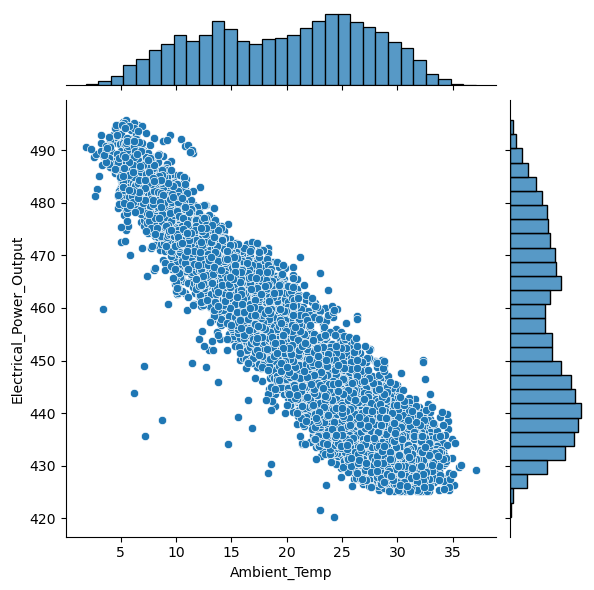

In [149]:
sns.jointplot(x='Ambient_Temp',y='Electrical_Power_Output',data=df)

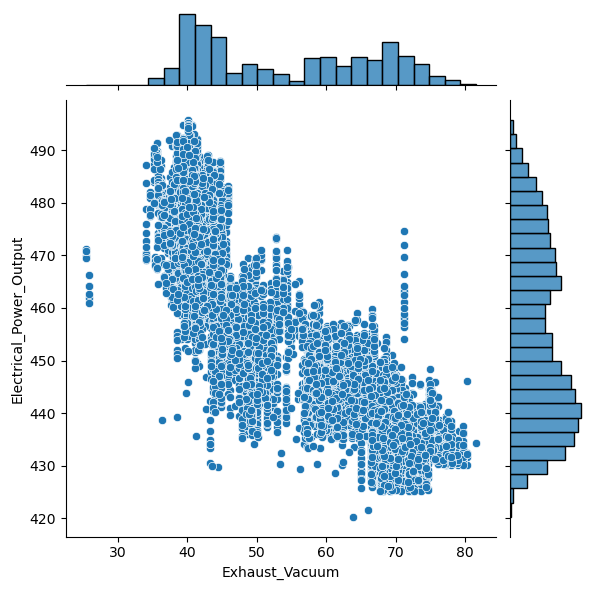

In [150]:
sns.jointplot(x='Exhaust_Vacuum',y='Electrical_Power_Output',data=df)

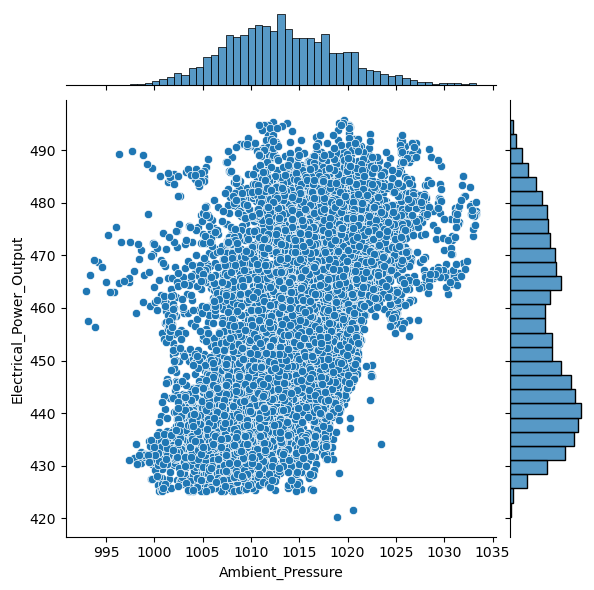

In [151]:
sns.jointplot(x='Ambient_Pressure',y='Electrical_Power_Output',data=df)

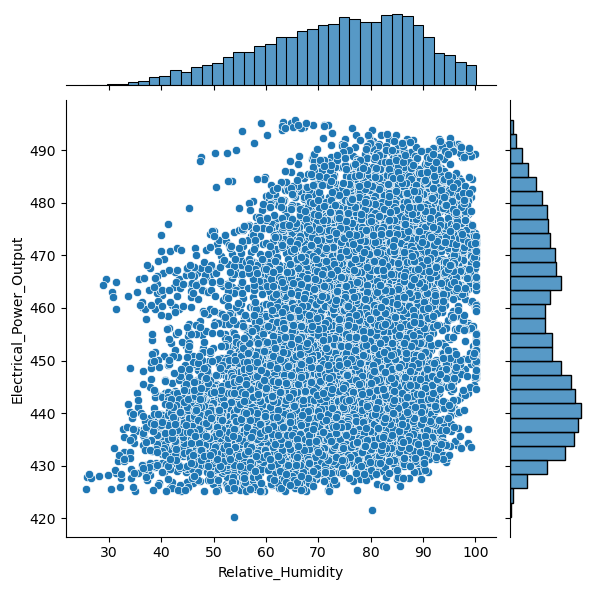

In [152]:
sns.jointplot(x='Relative_Humidity',y='Electrical_Power_Output',data=df)

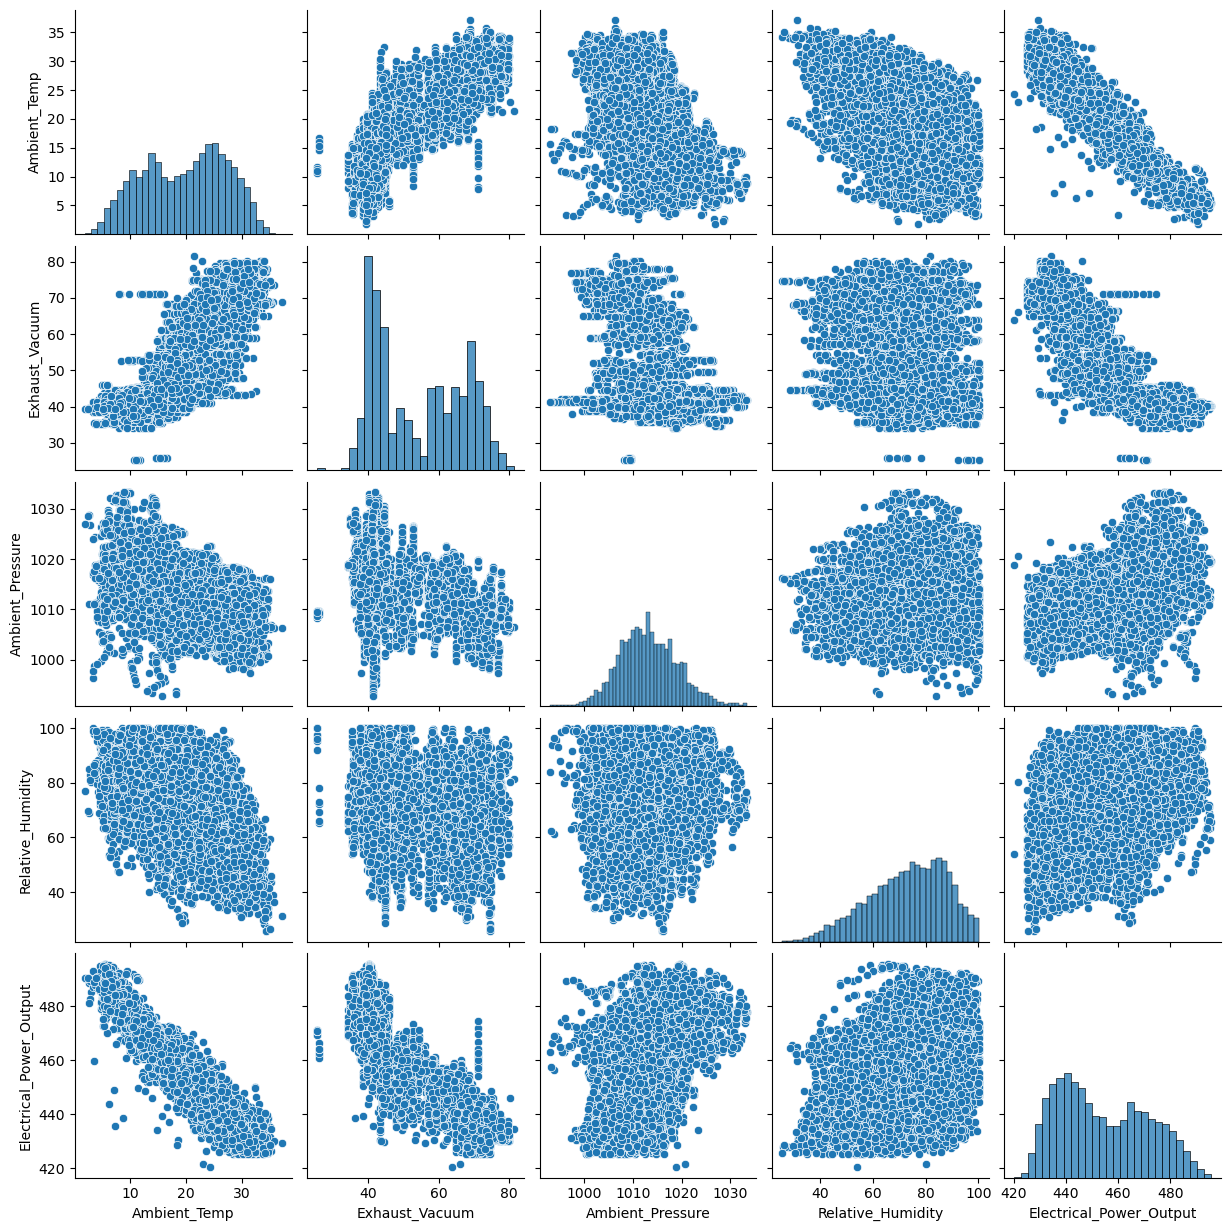

In [153]:
sns.pairplot(df)

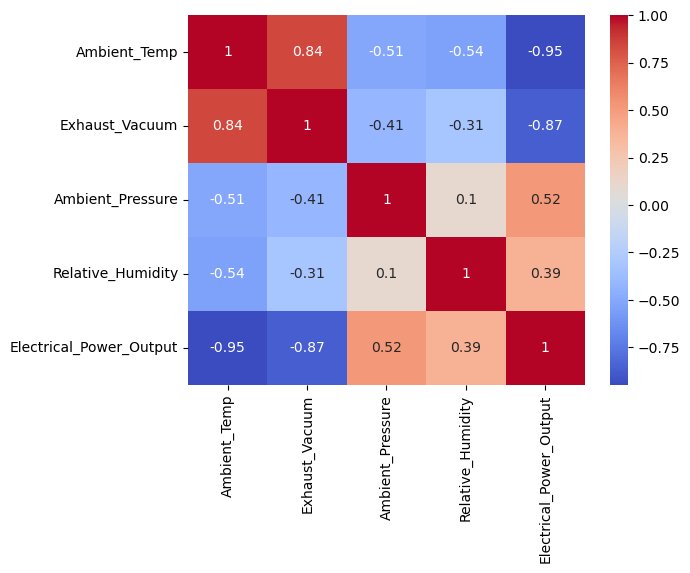

In [154]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

# Ambient pressure is the most highly correlation to the electrical power output of the plant
# Ambient temp is the most negatively correlation to the electrical power output of the plant

## Train Test Split

In [155]:
y = df['Electrical_Power_Output']
X = df.iloc[:, 0:4]

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Normalize features

In [157]:
# Initialize StandardScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and testing data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Simple Linear Regression

In [158]:
lm = LinearRegression()

In [159]:
lm.fit(X_train_scaled,y_train)

LinearRegression()

In [160]:
predictions = lm.predict(X_test_scaled)

In [189]:
# Create a dataframe with predicted values and actual values side by side
df_predictions = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
df_predictions

,Predicted,Actual
8052,470.771121,466.52
3198,461.978512,461.73
4847,455.789888,450.73
3535,447.125971,451.97
9181,451.025926,448.39
...,...,...
4448,462.055004,458.96
4766,445.315225,441.18
6764,428.578879,431.92
7104,447.352219,439.55


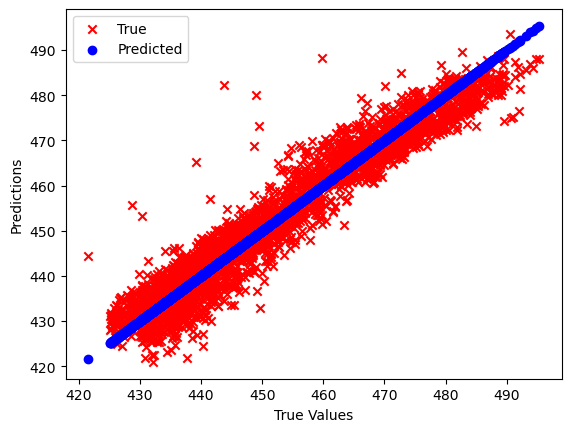

In [193]:
predictions = lm.predict(X_test_scaled)

plt.scatter(y_test, predictions, marker='x', color='red', label='True')
plt.scatter(y_test, y_test, marker='o', color='blue', label='Predicted')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

In [174]:
# Evaluate the model using metrics
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE_Simple = round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),4)


print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE_Simple)

MAE: 3.603119803276716
MSE: 21.023342493049764
RMSE: 4.5851


In [175]:
mean_target = df['Electrical_Power_Output'].mean()
mean_target
result_Simple = round((RMSE_Simple/mean_target)*100,3)

In [176]:
print('Predictions from this simple model have an average error of {}% relative to the mean target value'.format(result_Simple))

Predictions from this simple model have an average error of 1.009% relative to the mean target value


## Ridge Regression & K-Fold to improve RMSE score

In [183]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Fit the linear regression model
X = df.drop('Electrical_Power_Output', axis=1)
y = df['Electrical_Power_Output']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

# Get the fitted values and residuals
fitted_values = results.fittedvalues
residuals = results.resid

# Calculate Cook's distance
p = X.shape[1] - 1
MSE = np.mean(residuals**2)
influence = results.get_influence()
leverage = influence.hat_matrix_diag
cook_distance = (residuals / (p * MSE)) * (leverage / (1 - leverage)**2)

# Identify outliers with Cook's distance greater than threshold
threshold = 4 / (X.shape[0] - p - 1)
outliers = np.where(cook_distance > threshold)[0]

# Remove outliers and refit the model
X = X.drop(outliers, axis=0)
y = y.drop(outliers, axis=0)
model = sm.OLS(y, X)
results = model.fit()

# Get the new fitted values and residuals
new_fitted_values = results.fittedvalues
new_residuals = results.resid

# Calculate the new RMSE
RMSE = np.sqrt(np.mean(new_residuals**2))
result = round((RMSE / y.mean()) * 100, 3)

# Print the results
print('Linear regression model with outliers removed obtained RMSE of {} | {}% average error.'.format(round(RMSE, 4), result))

Linear regression model with outliers removed obtained RMSE of 4.5571 | 1.003% average error.


# Ridge Regression to improve RMSE

In [165]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
import numpy as np

# Define the number of folds
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Create a linear regression model
# Here I randomly initialize alpha=1.0, later use GridSearchCV to find optimal alpha value
model = Ridge(alpha=1.0)

# Perform cross-validation
mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
RMSE_Ridge = np.sqrt(-mse_scores)

# Print the RMSE scores for each fold
print("RMSE Scores:", RMSE_Ridge)

# Print the mean and standard deviation of the RMSE scores
print("Mean RMSE:", round((RMSE_Ridge.mean()),4))
RMSE_Ridge = round((RMSE_Ridge.mean()),4)
result_Ridge = round((RMSE_Ridge.mean()/mean_target)*100,3)
print('Predictions from this Ridge model have an average error of {}% relative to the mean target value'.format(result_Ridge))

RMSE Scores: [4.54533314 5.02226197 4.37216154 4.50570527 4.29913698 4.71820034
 4.29197729 4.70844728 4.42799891 4.64075539]
Mean RMSE: 4.5532
Predictions from this Ridge model have an average error of 1.002% relative to the mean target value


### The simple linear regression model obtained an average error of 1.009% while the Ridge model achieved a much better result of 1.002%

## Using GridSearchCV to find optimal hyperparameter alpha value

In [166]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the range of alpha values to search
alpha_range = np.linspace(-1, 20, 1000)

# Create a Ridge model object
ridge_model = Ridge()

# Create a parameter grid to search over
param_grid = {'alpha': alpha_range}

# Create a GridSearchCV object
grid_search = GridSearchCV(ridge_model, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best alpha value and corresponding RMSE score
print("Best Alpha:", grid_search.best_params_['alpha'])
print("Best RMSE Score:", np.sqrt(-grid_search.best_score_))
result = round((np.sqrt(-grid_search.best_score_)/mean_target)*100,3)
print('Predictions from this Ridge model have an average error of {}% relative to the mean target value'.format(result))


Best Alpha: 13.336336336336338
Best RMSE Score: 4.560030063593287
Predictions from this Ridge model have an average error of 1.004% relative to the mean target value


### Looks like performance became worse by using GridSearchCV

## Lasso Regression & K-Fold to improve RMSE score

In [167]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define the number of folds
k = 10

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Create a Lasso regression model
model = Lasso(alpha=1.0)

# Perform cross-validation
mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
RMSE_Lasso = np.sqrt(-mse_scores)

# Print the RMSE scores for each fold
print("RMSE Scores:", RMSE_Lasso)

# Print the mean and standard deviation of the RMSE scores
print("Mean RMSE:", round((RMSE_Lasso.mean()),4))
RMSE_Lasso = round((RMSE_Lasso.mean()),4)
result_Lasso = round((RMSE_Lasso.mean()/mean_target)*100,3)
print('Predictions from this Lasso model have an average error of {}% relative to the mean target value'.format(result_Lasso))


RMSE Scores: [4.56464436 4.48439388 4.34618091 4.72870413 4.50089726 4.64747077
 4.44910818 4.59090733 4.82096404 4.50335058]
Mean RMSE: 4.5637
Predictions from this Lasso model have an average error of 1.004% relative to the mean target value


## Elastic Net approach

In [177]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_boston
import numpy as np

# Define the Elastic Net model
model = ElasticNet()

# Define the hyperparameter grid
param_grid = {'alpha': np.logspace(-4, 4, 9), 'l1_ratio': [0.01, 0.25, 0.5, 0.75, 0.99]}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Train the Elastic Net model with the best hyperparameters
model = ElasticNet(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
RMSE_ElasticNet = round(np.sqrt(mse),4)
print("RMSE:", RMSE_ElasticNet)
result_ElasticNet = round((RMSE_ElasticNet/mean_target)*100,3)
print('Predictions from this Elastic model have an average error of {}% relative to the mean target value'.format(result_ElasticNet))

RMSE: 4.5851
Predictions from this Elastic model have an average error of 1.009% relative to the mean target value


## Neural Network Approach

In [169]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
#model.add(Dropout(0.1))  
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history =  model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the test data
mse = model.evaluate(X_test, y_test, verbose=1)
RMSE_NN = np.sqrt(mse)

# Print the RMSE
print("RMSE:", RMSE_NN)


Epoch 1/100
210/210 [==============================] - 0s 528us/step - loss: 13191.1387
Epoch 2/100
210/210 [==============================] - 0s 574us/step - loss: 569.2859
Epoch 3/100
210/210 [==============================] - 0s 576us/step - loss: 515.2499
Epoch 4/100
210/210 [==============================] - 0s 548us/step - loss: 455.0752
Epoch 5/100
210/210 [==============================] - 0s 552us/step - loss: 390.0897
Epoch 6/100
210/210 [==============================] - 0s 571us/step - loss: 324.7296
Epoch 7/100
210/210 [==============================] - 0s 525us/step - loss: 263.3379
Epoch 8/100
210/210 [==============================] - 0s 502us/step - loss: 208.4963
Epoch 9/100
210/210 [==============================] - 0s 651us/step - loss: 161.3402
Epoch 10/100
210/210 [==============================] - 0s 601us/step - loss: 122.4546
Epoch 11/100
210/210 [==============================] - 0s 553us/step - loss: 92.3009
Epoch 12/100
210/210 [=============================

In [180]:
result_NN = round((RMSE_NN/mean_target)*100,3)
RMSE_NN = round(RMSE_NN,4)
print("RMSE:", round(RMSE_NN,4))
print('Predictions from this neural network approach have an average error of {}% relative to the mean target value'.format(result_NN))

RMSE: 5.686
Predictions from this neural network approach have an average error of 1.251% relative to the mean target value


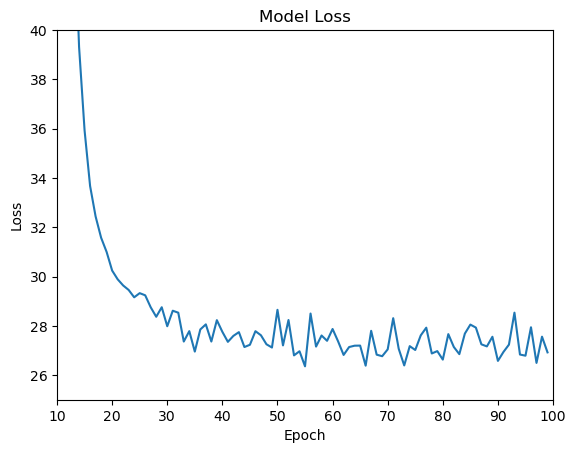

In [171]:
# Plot the epoch vs loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xlim(10, 100)
plt.ylim(25, 40)
plt.show()

# Conclusion and Summary

In [181]:
print('Simple linear regression model obtained RMSE of {} | {}% average error'.format(RMSE_Simple,result_Simple))
print('\n')
print('Ridge regression model obtained RMSE of {} | {}% average error'.format(RMSE_Ridge,result_Ridge))
print('\n')
print('Lasso regression model obtained RMSE of {} | {}% average error'.format(RMSE_Lasso,result_Lasso))
print('\n')
print('Elastic Net regression model obtained RMSE of {} | {}% average error'.format(RMSE_ElasticNet,result_ElasticNet))
print('\n')
print('Neural network model obtained RMSE of {} | {}% average error'.format(RMSE_NN,result_NN))

Simple linear regression model obtained RMSE of 4.5851 | 1.009% average error


Ridge regression model obtained RMSE of 4.5532 | 1.002% average error


Lasso regression model obtained RMSE of 4.5637 | 1.004% average error


Elastic Net regression model obtained RMSE of 4.5851 | 1.009% average error


Neural network model obtained RMSE of 5.686 | 1.251% average error


### To conclude, Ridge regression approach has the best performance at an average error of 1.002%
#### Neural network approach performed the worst and this could be likely due to a given simplistic dataset. Neural networks are better suited for large and complex datasets and might have better performance if the hyperparameters are carefully tuned.